In [1]:
!pwd

/home/aquila/dev_ws/DeepLearning/src


In [3]:
import os

path = '../data/dogs-vs-cats/train/'
os.listdir(path)

['cat.3136.jpg',
 'cat.719.jpg',
 'cat.55.jpg',
 'dog.6158.jpg',
 'cat.6574.jpg',
 'cat.6543.jpg',
 'cat.7743.jpg',
 'cat.2439.jpg',
 'cat.3903.jpg',
 'cat.9435.jpg',
 'cat.1397.jpg',
 'cat.11602.jpg',
 'dog.8202.jpg',
 'cat.1319.jpg',
 'dog.11742.jpg',
 'dog.3505.jpg',
 'cat.9398.jpg',
 'dog.6521.jpg',
 'dog.3407.jpg',
 'cat.8079.jpg',
 'dog.6381.jpg',
 'cat.7462.jpg',
 'cat.7058.jpg',
 'cat.964.jpg',
 'dog.8437.jpg',
 'dog.3263.jpg',
 'dog.11300.jpg',
 'dog.4131.jpg',
 'cat.243.jpg',
 'dog.8259.jpg',
 'cat.5750.jpg',
 'dog.635.jpg',
 'cat.2128.jpg',
 'cat.11214.jpg',
 'cat.3206.jpg',
 'cat.8884.jpg',
 'dog.3065.jpg',
 'dog.11899.jpg',
 'cat.11186.jpg',
 'cat.10878.jpg',
 'dog.5809.jpg',
 'cat.4780.jpg',
 'cat.2359.jpg',
 'dog.4245.jpg',
 'dog.10926.jpg',
 'dog.4988.jpg',
 'cat.4428.jpg',
 'cat.9141.jpg',
 'cat.3471.jpg',
 'dog.9452.jpg',
 'cat.7959.jpg',
 'cat.10574.jpg',
 'dog.9627.jpg',
 'dog.10049.jpg',
 'cat.11775.jpg',
 'cat.5206.jpg',
 'cat.4998.jpg',
 'cat.4812.jpg',
 'dog.303

In [4]:
full_names = os.listdir(path)[:10000]
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [5]:
!pwd

/home/aquila/dev_ws/DeepLearning/src


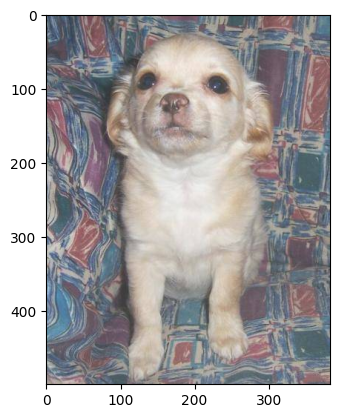

In [6]:
import random 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [7]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(434, 350, 3)

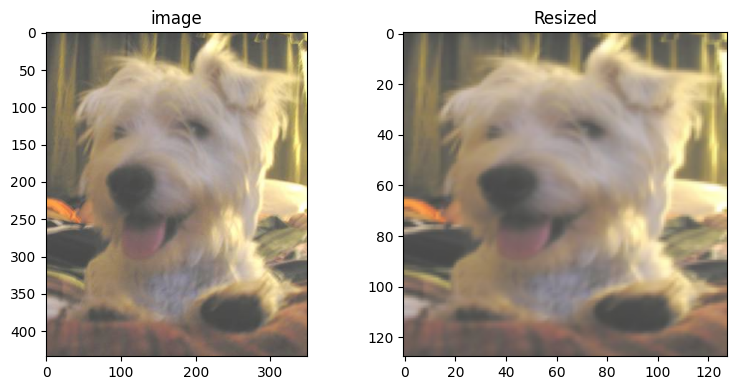

In [8]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize = (8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap = plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()


In [9]:
from tqdm import tqdm
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (128, 128, 3)))
images = np.array(images)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
images.shape, labels[:3]

((10000, 128, 128, 3), ['cat', 'cat', 'cat'])

In [11]:
images[:3]

array([[[[0.59664081, 0.56918983, 0.53781728],
         [0.60187989, 0.57442891, 0.54305636],
         [0.609464  , 0.58201302, 0.55064047],
         ...,
         [0.38110336, 0.34218895, 0.29532004],
         [0.44579035, 0.40800786, 0.36833042],
         [0.35054366, 0.31526162, 0.27897244]],

        [[0.60782322, 0.58037224, 0.54899969],
         [0.61430854, 0.58685756, 0.55548501],
         [0.62380851, 0.59635753, 0.56498498],
         ...,
         [0.44580615, 0.41229368, 0.37242568],
         [0.34965212, 0.31579933, 0.27981168],
         [0.26185931, 0.23042064, 0.19935394]],

        [[0.61057431, 0.58312333, 0.55175078],
         [0.61638856, 0.58893758, 0.55756503],
         [0.62627573, 0.59882474, 0.5674522 ],
         ...,
         [0.32646979, 0.29848779, 0.26648434],
         [0.23891814, 0.21789975, 0.18435656],
         [0.22334847, 0.20430679, 0.17796434]],

        ...,

        [[0.6575193 , 0.64548172, 0.61816718],
         [0.66216944, 0.65013186, 0.62281731]

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0]), array(['cat', 'dog'], dtype='<U3'))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels_encoded, test_size = 0.2,
                     random_state = 13, stratify = labels_encoded)
X_train.shape, X_test.shape

((8000, 128, 128, 3), (2000, 128, 128, 3))

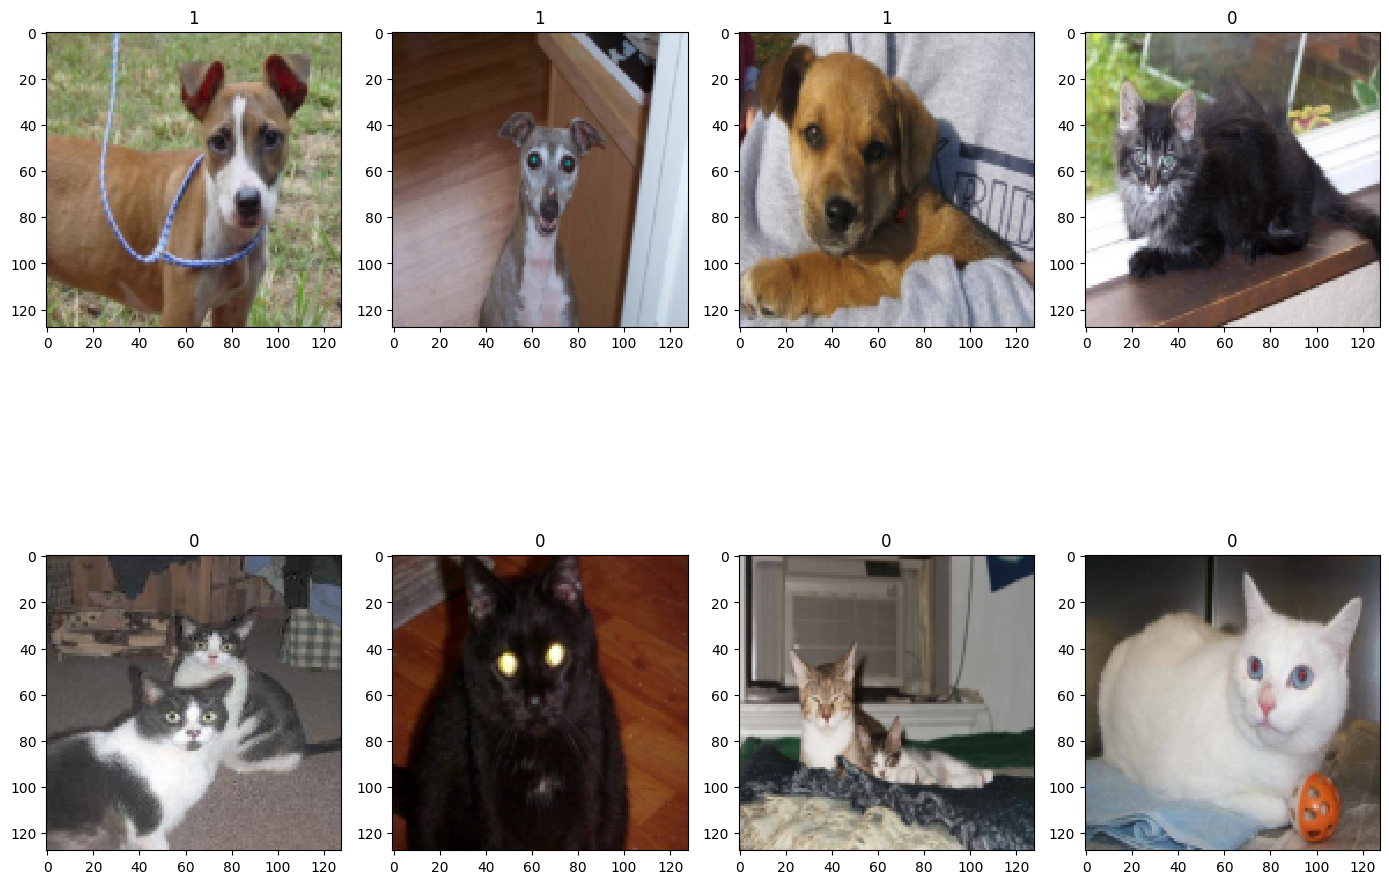

In [14]:
samples = random.choices(population = range(0, 8000), k = 8)
plt.figure(figsize = (14, 12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(X_train[n], cmap = 'Greys',
               interpolation = 'nearest')
    plt.title(y_train[n])
plt.tight_layout()
plt.show()

In [15]:
from tensorflow.keras import layers, models  

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation = 'softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0

2023-11-03 14:59:40.079435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-03 14:59:41.317078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-03 14:59:41.317379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-03 14:59:41.320179: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [16]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
import time 
start_time = time.time()
hist = model.fit(X_train.reshape(128, 128, 3), y_train,
                 epochs = 5, verbose = 1,
                 validation_data = (X_test.reshape(128, 128, 3), y_test))
print('fit time : ', time.time() - start_time)

ValueError: cannot reshape array of size 393216000 into shape (128,128,3)

In [20]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()


NameError: name 'hist' is not defined

<Figure size 1200x800 with 0 Axes>

: 